welcome to chapter 2 of pytorch


In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [2]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02
x=torch.arange(start, end, step).unsqueeze(dim=1)
y=x*weight+bias
x,y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [3]:
len(x),len(y)

(50, 50)

splitting data into train and test dataset

In [4]:
split=int(0.8*len(x))
x_train=x[0:split]
y_train=y[0:split]

x_test=x[split:]
y_test=y[split:]


using figure to understand the dataset using matplotlib

In [5]:
def plot_predictions(train_data=x_train,
                     train_label=y_train,
                     test_data=x_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,color="g",s=10,label="train") #s=size
  plt.scatter(test_data,test_label,color="b",label="test")

  if predictions is not None:
     plt.scatter(test_data,predictions,color="r",s=10,label="preditcions") #s=size
  plt.legend()




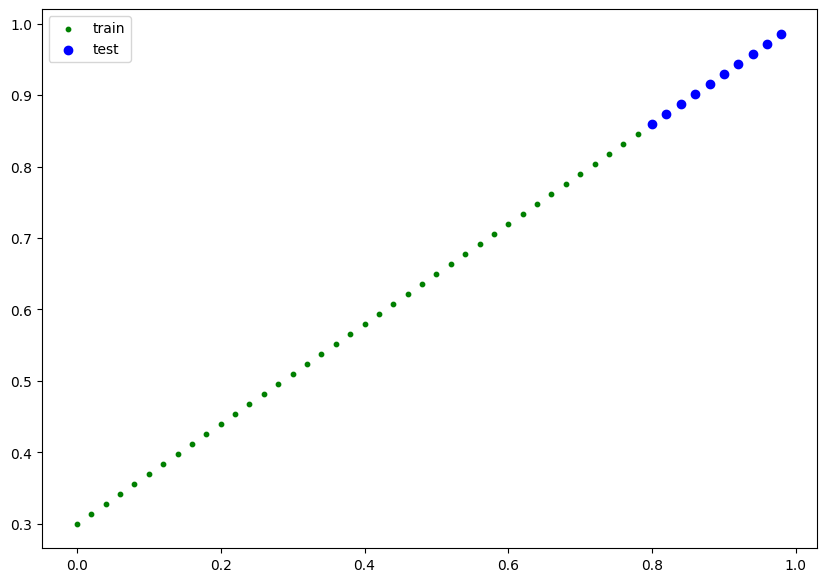

In [6]:
plot_predictions()

building the first pytorch model

In [7]:
from torch import nn
#create a linear regression model class

class LinearRegModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))

    self.bias=nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))

#forward menthod to define computation in    the model

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weight*x+self.bias


In [8]:
#creating a random seed
# torch.manual_seed(42)

# model_0=LinearRegModel()  commented line 2 and 4 at 6.42.43,tyo vanda agadi chai commented theana

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

dont forget to search difference between torch.rand and torch.randn

In [9]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
with torch.inference_mode():
  y_preds=model_0(x_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [11]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

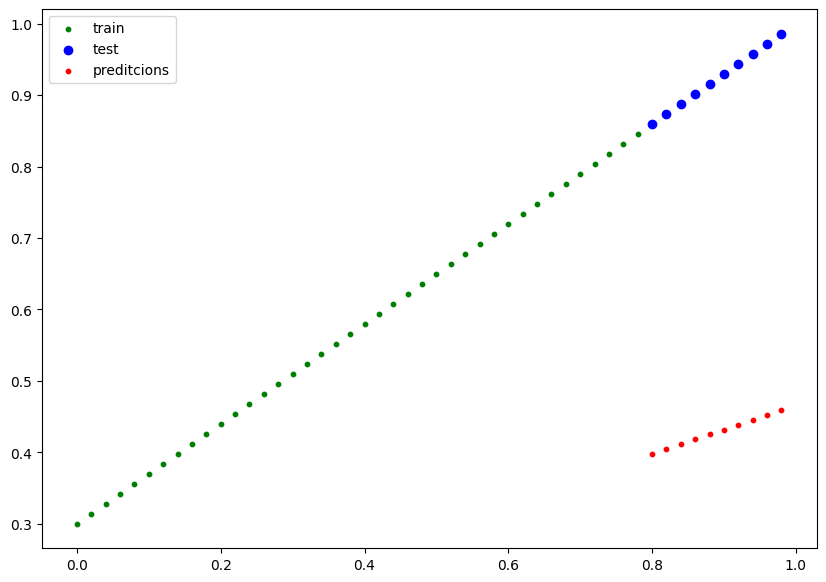

In [12]:
plot_predictions(predictions=y_preds)

In [15]:
#setting up loss func
loss_fn=nn.L1Loss()


#setting up optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)  #lr=learning rate=u need to set it ourself



In [19]:
 list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
torch.manual_seed(42)


#building a training and testing loop in pytorch
epochs=1  #epoch is the one  loop through the data...



#training the model

for epoch in range(epochs):
  #set the model to training mode
  model_0.train()

  #1 forward pass
  y_preds=model_0(x_train)

  #2 calculate the loss
  loss=loss_fn(y_preds,x_train)

  #3 optimizer zero grad
  optimizer.zero_grad()

  #4 perform backpropagartion on loss with respect to the paraeters of the model
  loss.backward()

  #5 step the optimizer(perform gradient decent)
  optimizer.step()



  model_0.eval() #turns off the gradient tracking

#6.60.1

l